In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# temporary correction
setattr(
    tfds.image_classification.cats_vs_dogs,
    "_URL",
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
  )

data, metadata = tfds.load(
    'cats_vs_dogs',
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.3HSEF2_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
print(metadata)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpn5lhlsmetfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

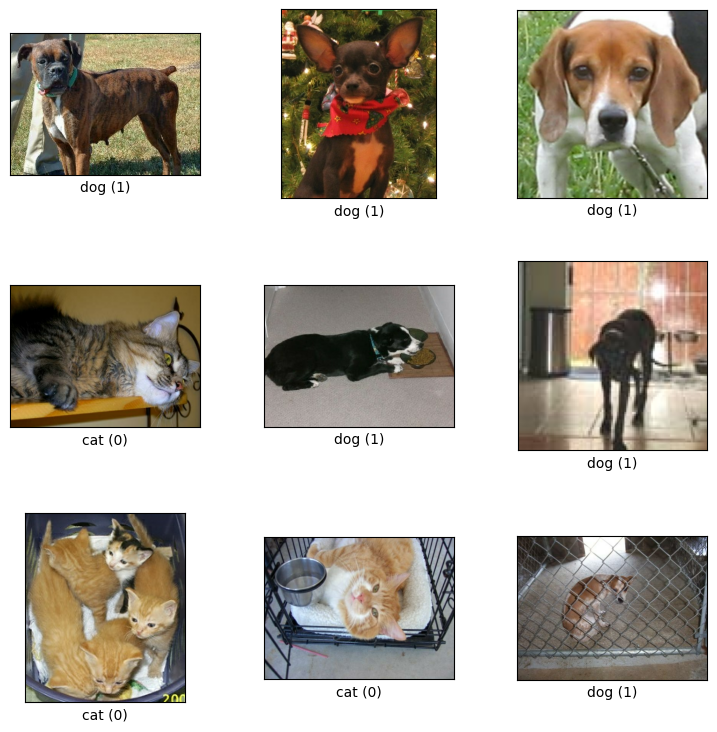

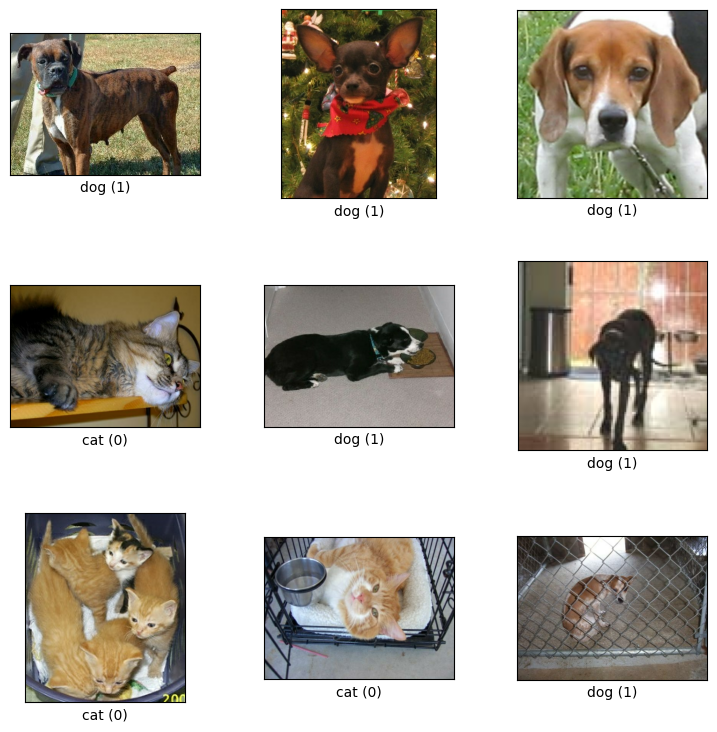

In [5]:
tfds.show_examples(data['train'], metadata)

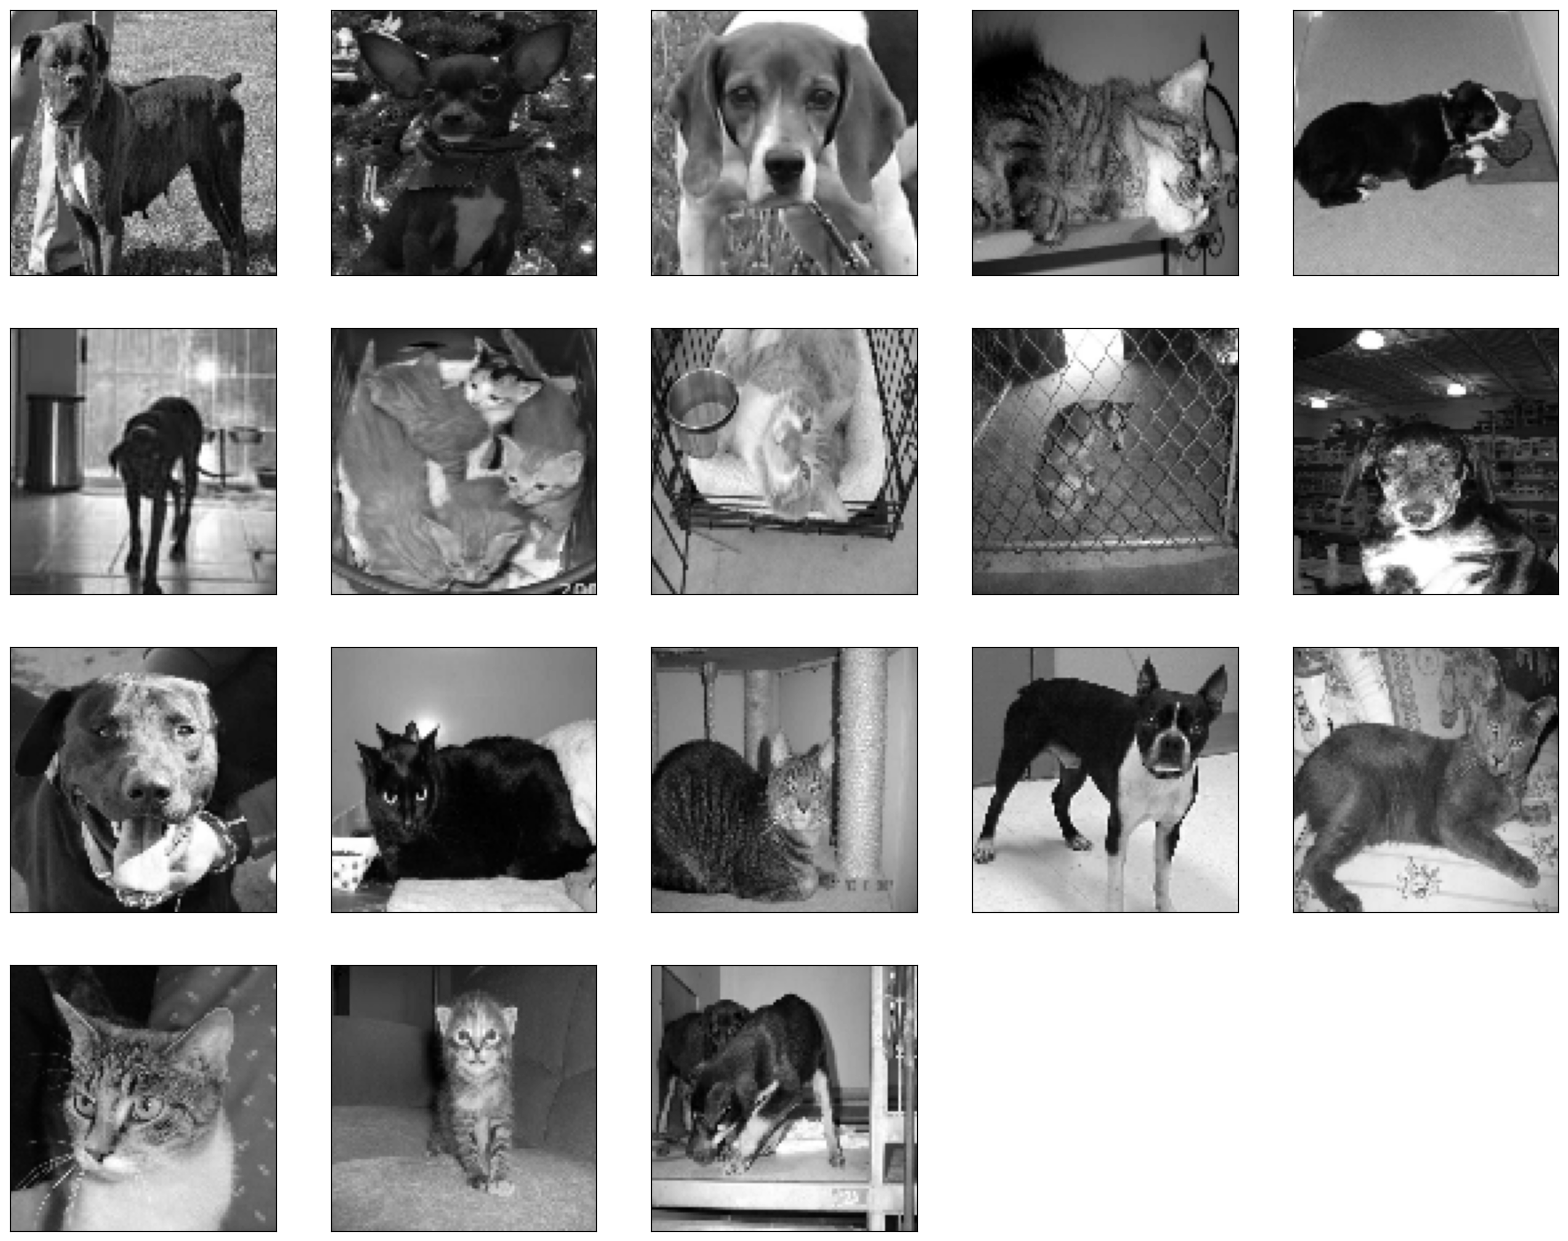

In [6]:
import matplotlib.pyplot as plt
import cv2

PLOT_SIZE = 20
IMAGE_SIZE = 100

plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE))

x_training_images, y_training_labels = [], []

for index, (images, label) in enumerate(data['train'].take(18)):
  images = cv2.resize(images.numpy(), (IMAGE_SIZE, IMAGE_SIZE))
  images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

  plt.subplot(5, 5, index + 1)
  plt.imshow(images, cmap='gray')
  plt.xticks([])
  plt.yticks([])

  images = images.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

  x_training_images.append(images)
  y_training_labels.append(label)

In [7]:
print(x_training_images)
print(y_training_labels)

[array([[[249],
        [190],
        [105],
        ...,
        [189],
        [196],
        [143]],

       [[232],
        [127],
        [ 88],
        ...,
        [187],
        [180],
        [186]],

       [[171],
        [ 87],
        [ 83],
        ...,
        [129],
        [158],
        [166]],

       ...,

       [[113],
        [173],
        [162],
        ...,
        [143],
        [156],
        [119]],

       [[140],
        [152],
        [171],
        ...,
        [ 98],
        [155],
        [154]],

       [[ 91],
        [109],
        [167],
        ...,
        [ 46],
        [ 51],
        [ 47]]], dtype=uint8), array([[[149],
        [114],
        [ 93],
        ...,
        [103],
        [ 72],
        [ 81]],

       [[127],
        [ 63],
        [ 79],
        ...,
        [131],
        [ 70],
        [ 98]],

       [[ 82],
        [ 65],
        [ 58],
        ...,
        [ 75],
        [ 91],
        [ 94]],

       ...,

       [[ 30],

In [8]:
import numpy as np

PIXELS_NUMBER = 255

x_normalized_training_images = np.array(x_training_images).astype(float) / PIXELS_NUMBER
y_normalized_training_labels = np.array(y_training_labels)

In [9]:
print(x_normalized_training_images)
print(y_normalized_training_labels)

[[[[0.97647059]
   [0.74509804]
   [0.41176471]
   ...
   [0.74117647]
   [0.76862745]
   [0.56078431]]

  [[0.90980392]
   [0.49803922]
   [0.34509804]
   ...
   [0.73333333]
   [0.70588235]
   [0.72941176]]

  [[0.67058824]
   [0.34117647]
   [0.3254902 ]
   ...
   [0.50588235]
   [0.61960784]
   [0.65098039]]

  ...

  [[0.44313725]
   [0.67843137]
   [0.63529412]
   ...
   [0.56078431]
   [0.61176471]
   [0.46666667]]

  [[0.54901961]
   [0.59607843]
   [0.67058824]
   ...
   [0.38431373]
   [0.60784314]
   [0.60392157]]

  [[0.35686275]
   [0.42745098]
   [0.65490196]
   ...
   [0.18039216]
   [0.2       ]
   [0.18431373]]]


 [[[0.58431373]
   [0.44705882]
   [0.36470588]
   ...
   [0.40392157]
   [0.28235294]
   [0.31764706]]

  [[0.49803922]
   [0.24705882]
   [0.30980392]
   ...
   [0.51372549]
   [0.2745098 ]
   [0.38431373]]

  [[0.32156863]
   [0.25490196]
   [0.22745098]
   ...
   [0.29411765]
   [0.35686275]
   [0.36862745]]

  ...

  [[0.11764706]
   [0.29803922]
   [0.3

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    x_normalized_training_images,
    y_normalized_training_labels,
    batch_size=32,
    validation_split=0.15,
    epochs=100
)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6891 - accuracy: 0.6000 - val_loss: 1.0898 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.7571 - accuracy: 0.6000 - val_loss: 0.7641 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6365 - accuracy: 0.6000 - val_loss: 0.6955 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6357 - accuracy: 0.7333 - val_loss: 0.7016 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6060 - accuracy: 0.6667 - val_loss: 0.7889 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5716 - accuracy: 0.6667 - val_loss: 0.8527 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5464 - accuracy: 0.6667 - val_loss: 0.7251 - val_accuracy: 0.3333
Epoch 8/100
1/1 [=====

In [33]:
import math

from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
PIVOT = math.ceil(
    len(x_normalized_training_images) * .85
)

data_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

data_generator.fit(x_normalized_training_images)

x_training = x_normalized_training_images[:PIVOT]
x_validation = x_normalized_training_images[PIVOT:]

y_training = y_normalized_training_labels[:PIVOT]
y_validation = y_normalized_training_labels[PIVOT:]

training_data_generator = data_generator.flow(
    x_training,
    y_training,
    batch_size=BATCH_SIZE,
    shuffle=False
)

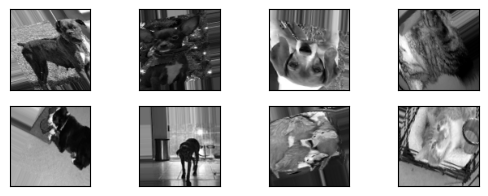

In [34]:
images, _ = next(training_data_generator)

for index, image in enumerate(images):
  image = image.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

  plt.subplot(4, 4, index + 1)
  plt.imshow(image, cmap="gray")
  plt.xticks([])
  plt.yticks([])

In [35]:
da_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

da_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [37]:
da_model.fit(
    training_data_generator,
    epochs=150,
    batch_size=BATCH_SIZE,
    validation_data=(
        x_validation,
        y_validation
    ),
    steps_per_epoch=int(
        math.ceil(len(x_training) / float(BATCH_SIZE))
    ),
    validation_steps=int(
        math.ceil(len(x_validation) / float(BATCH_SIZE))
    )
)

Epoch 1/150
1/1 [==============================] - 0s 49ms/step - loss: 0.6002 - accuracy: 0.8750 - val_loss: 2.3046 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.1367 - accuracy: 1.0000 - val_loss: 1.9489 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 58ms/step - loss: 0.1148 - accuracy: 1.0000 - val_loss: 1.3647 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.3291 - accuracy: 0.8750 - val_loss: 0.8822 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.1175 - accuracy: 1.0000 - val_loss: 0.7390 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.1391 - accuracy: 0.8750 - val_loss: 0.4878 - val_accuracy: 1.0000
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.5974 - accuracy: 0.6250 - val_loss: 1.5967 - val_accuracy: 0.0000e

In [38]:
da_model.save("dog-cat-cnn-da.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
!mkdir out

In [3]:
!tensorflowjs_converter --input_format keras dog-cat-cnn-da.h5 out

2024-06-13 13:31:30.513658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 13:31:31.549240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
